In [2]:
import numpy as np
from my_ueg import my_ueg
from pyscf import gto, scf, cc

In [13]:
nocc_list = np.array([7, 19, 27, 33, 57]) #, 81, 93
# rs_list = np.array([4.])
gap_list = np.empty_like(nocc_list)

# eccsd_list = np.empty_like(nocc_list)
for i,nocc in enumerate(nocc_list):
    my_sys = my_ueg(4, (nocc, nocc), np.sqrt(2)) #np.sqrt(2))
    print('num kpts: ',my_sys.nkpts)
    h0 = my_sys.madelung() / 2
    h1 = my_sys.get_h1_real()
    cderi = my_sys.get_cderi_real()

    mol = gto.M()
    mol.nelectron = my_sys.nparticle
    mol.nao = my_sys.nkpts
    mol.incore_anyway = True
    mol.max_memory = 20000
    mol.verbose = 4

    dm = np.zeros((my_sys.nkpts,my_sys.nkpts))
    dm[:nocc,:nocc] = np.eye(nocc) * 2.0

    mf = scf.RHF(mol).density_fit()
    mf.energy_nuc = lambda *args: h0
    mf.get_hcore = lambda *args: h1
    mf.get_ovlp = lambda *args: np.eye(my_sys.nkpts)
    mf._cderi = cderi
    mf.init_guess = "1e"
    mf.max_cycle = -1
    escf = mf.kernel(dm0=dm)
    # emf_list[i] = escf
    homo = mf.mo_energy[nocc-1]
    lumo = mf.mo_energy[nocc]
    gap_list[i] = lumo-homo


    # mf.mo_coeff = np.eye(my_sys.nkpts)

    # print(f"escf: {escf}")
    # print(f"escf per electron: {escf/my_sys.nparticle}")

    # mycc = cc.RCCSD(mf)
    # mycc.max_cycle = 100
    # mycc.conv_tol = 1e-7
    # mycc.kernel()
    # eccsd_list[i] = mycc.e_tot

    # et = mycc.ccsd_t()
    # print("CCSD energy", mycc.e_corr)
    # print("CCSD energy per electron", mycc.e_corr / my_sys.nparticle)
    # print("CCSD(T) energy", et)
    # print("CCSD(T) energy per electron", et / my_sys.nparticle)

num kpts:  19


******** <class 'pyscf.df.df_jk.DFRHF'> ********
method = DFRHF
initial guess = 1e
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = -1
direct_scf = False
chkfile to save SCF result = /tmp/tmpxpyyun4j
max_memory 20000 MB (current use 160 MB)
Set gradient conv threshold to 3.16228e-05
init E= -0.819525910995715
  HOMO = 0.0151648559969004  LUMO = 0.090411936681286
SCF not converged.
SCF energy = -0.819525910995715
num kpts:  57


******** <class 'pyscf.df.df_jk.DFRHF'> ********
method = DFRHF
initial guess = 1e
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = -1
direct_scf = False
chkfile to save SCF result = /tmp/tmpw2p2h988
max_memory 20000 MB (current use 229 MB)
Set gradient conv thres

/tmp/ipykernel_17219/34496480.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


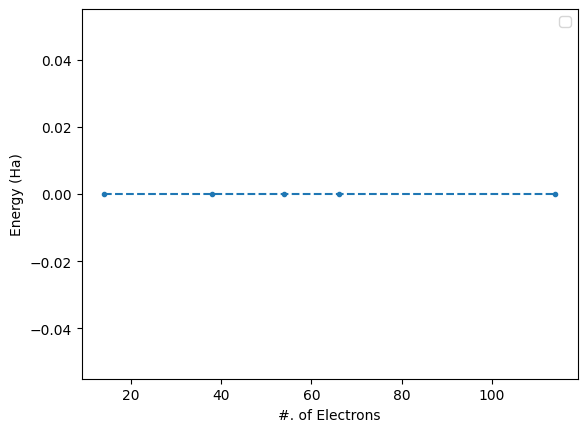

In [14]:
from matplotlib import pyplot as plt
plt.plot(nocc_list*2,gap_list,'.--',color='C0')
plt.xlabel('#. of Electrons')
plt.ylabel('Energy (Ha)')
plt.legend()
plt.show()